In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def transform_intensities(x):
    if x < 0.25:
        return 1 - x
    elif x < 0.5:
        return 1
    else:
        return x

In [5]:
vectorize = np.vectorize(transform_intensities)

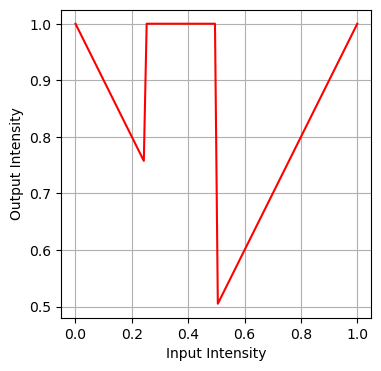

In [9]:
x = np.linspace(0, 1, 100)  
y = vectorize(x)
plt.figure(figsize=(4, 4))
plt.plot(x, y, label='f(x) Transformation', color='r')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()

In [11]:
img=cv2.imread(r"C:\Users\Fujitsu T\Desktop\journal 7\images.jfif")

In [15]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [17]:
normalized_img = img_gray / 255.0

In [19]:
transformed_img = vectorize(normalized_img)

In [21]:
output_img = np.clip(transformed_img * 255, 0, 255).astype(np.uint8)

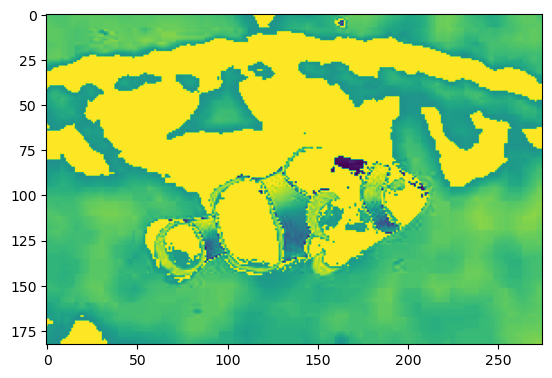

In [23]:
plt.imshow(output_img)

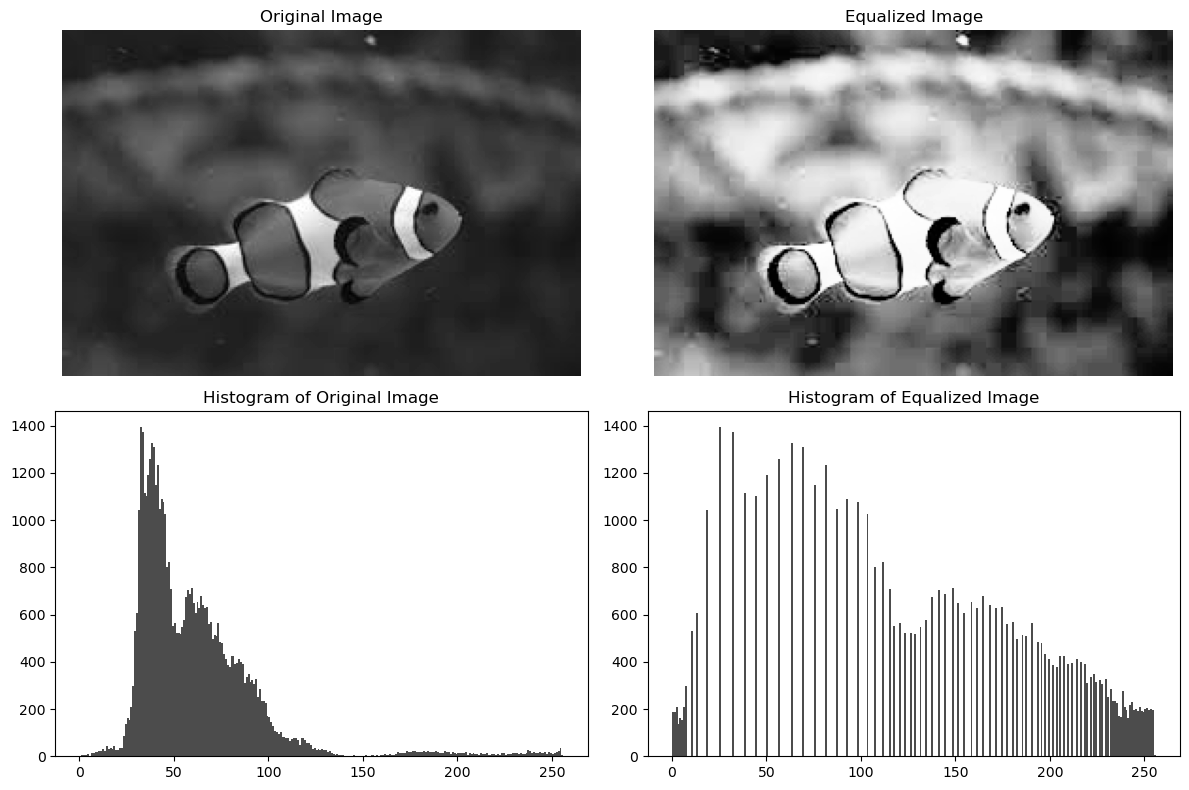

In [33]:
def myhist_equ(img):
   
    h = np.zeros(256, dtype=int) 

    rows, cols = img.shape  
    for i in range(rows):
        for j in range(cols):
            h[img[i, j]] += 1 
   
    cum_h = np.zeros(256, dtype=int)  
    cum_h[0] = h[0] 

    for k in range(1, 256):
        cum_h[k] = cum_h[k - 1] + h[k] 

    
    out_image = np.zeros_like(img) 
    total_pixels = rows * cols

    for i in range(rows):
        for j in range(cols):
            pixel_value = img[i, j]
            out_image[i, j] = (cum_h[pixel_value] * 255) // total_pixels 

   
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Equalized Image
    plt.subplot(2, 2, 2)
    plt.imshow(out_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    # Histogram of Original Image
    plt.subplot(2, 2, 3)
    plt.hist(img.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title('Histogram of Original Image')

    # Histogram of Equalized Image
    plt.subplot(2, 2, 4)
    plt.hist(out_image.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title('Histogram of Equalized Image')

    plt.tight_layout()
    plt.show()

myhist_equ(img_gray)

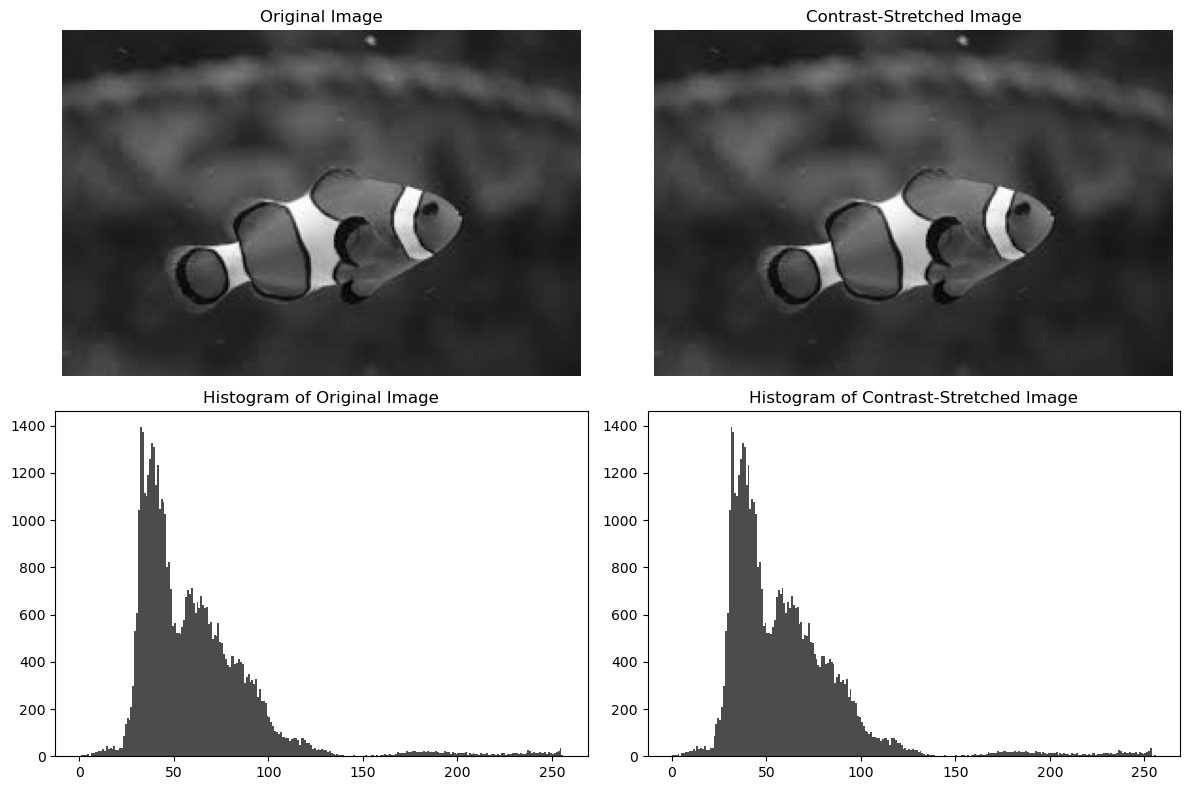

In [35]:
def contrastStretch(image):
    
    min_val = np.min(image)
    max_val = np.max(image)

    
    stretched_image = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    
    plt.figure(figsize=(12, 8))

    
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    
    plt.subplot(2, 2, 2)
    plt.imshow(stretched_image, cmap='gray')
    plt.title('Contrast-Stretched Image')
    plt.axis('off')

    
    plt.subplot(2, 2, 3)
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title('Histogram of Original Image')

    
    plt.subplot(2, 2, 4)
    plt.hist(stretched_image.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title('Histogram of Contrast-Stretched Image')

    plt.tight_layout()
    plt.show()

contrastStretch(img_gray)